In [110]:
from numpy import *
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [111]:
def load():
    x = loadtxt('F:/MLAlgorithm/LogisticRegression/logistic_x.txt',dtype = float)
    label = loadtxt('F:/MLAlgorithm/LogisticRegression/logistic_y.txt',dtype = int)
    m,n = shape(x)
    x0 = ones((m,1))
    data = c_[x0,x]
    datamat = mat(data)
    labelmat = mat(label).T
    return datamat, labelmat

In [112]:
datamat, labelmat = load()

In [113]:
def sigmoid(x):
    return 1.0/(1 + exp(-x))

In [114]:
def batchGradAscent(dataMat,labelMat):
    alpha = 0.0001
    maxCycles = 100000
    m, n = shape(dataMat)  
    weights = ones((n, 1))   
    for i in range(maxCycles):  
        h = sigmoid(dataMat*weights)  
        error = labelMat - h       
        weights += alpha*dataMat.T*error  
    return weights 

In [149]:
def stocGradAscent(dataMat,labelMat):
    alpha = 0.04
    m,n = shape(dataMat)
    weights = ones((n,1))   
    for i in range(m):
        h = sigmoid(dot(dataMat[i], weights))
        error = float(labelMat[i] - h)
        weights += alpha*error*dataMat[i].transpose()
    return weights


In [150]:
def newtonMethod(dataMat, labelMat):
    maxCycles = 100
    m, n = shape(dataMat)
    weights = mat(zeros(n)).T
    gradient = mat(zeros(n)).T
    hessian = mat(zeros((n,n)))
    for j in range(maxCycles):
        for i in range(m):
            error = float(sigmoid(weights.T * dataMat[i, :].T) - labelMat[i])
            gradient += error*dataMat[i, :].T
        gradient = gradient / m
        
        for i in range(m):
            hessian += sigmoid(float(weights.T * dataMat[i,:].T)) * (1 - sigmoid(float(weights.T * dataMat[i,:].T))) * dataMat[i,:].T * dataMat[i,:]
        hessian = hessian / m
        hessian_inv = inv(hessian)
        weights = weights - hessian_inv * gradient
    return weights

In [151]:
sk = LogisticRegression()
sk.fit(datamat, labelmat)


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
batchWeights = batchGradAscent(datamat, labelmat)
stocWeights = stocGradAscent(datamat, labelmat)
newtonWeights = newtonMethod(datamat, labelmat)
skWeights = mat(sk.coef_).T

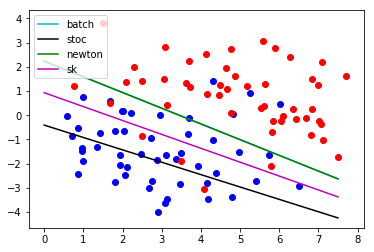

In [153]:
m,n = shape(datamat)
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(m):
    if(float(labelmat[i]) == 1):
        ax.scatter(array(datamat[i,1]), array(datamat[i,2]), c =  'r')
    else:
        ax.scatter(array(datamat[i,1]), array(datamat[i,2]), c = 'b')
x1 = arange(0,8,0.5)
x2 = (-float(batchWeights[0]) - float(batchWeights[1]) * x1) / float(batchWeights[2] )
x3 = (-float(stocWeights[0]) - float(stocWeights[1]) * x1) / float(stocWeights[2] )
x4 = (-float(newtonWeights[0]) - float(newtonWeights[1]) * x1) / float(newtonWeights[2] )
x5 = (-float(skWeights[0]) - float(skWeights[1]) * x1) / float(skWeights[2] )

ax.plot(x1, x2, color="c",  linestyle="-", label="batch")
ax.plot(x1, x3, color="black",   linestyle="-", label="stoc")
ax.plot(x1, x4, color="green",   linestyle="-", label="newton")
ax.plot(x1, x5, color="m",   linestyle="-", label="sk")
plt.legend(loc='upper left')

plt.show()